In [ ]:
# Rolling ball filter
/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/OligoPool_19Dec2019/Final_combined_19Dec2019.fasta

In [1]:
from fish_helpers import *

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
md_path = '/hybedata/Images/Robert/TBI_v2/tbi_m3_slide1_ventral_2020Jan17/nucstain_11/'
md = Metadata(md_path)

In [3]:
img = md.stkread(Position='Pos1',Zindex=15)[:,:,0]

opening img_Pos1_000000015_000000000_DeepBlue_000_015.tif

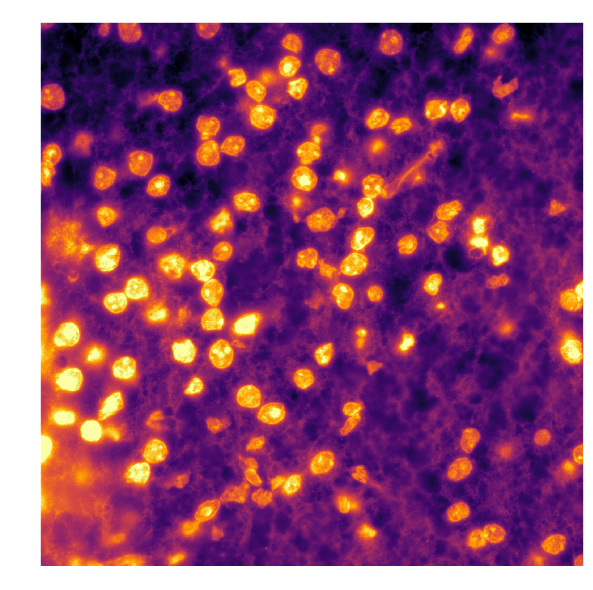

In [4]:
Display(img)

In [6]:
import cv2
from cv2_rolling_ball import subtract_background_rolling_ball

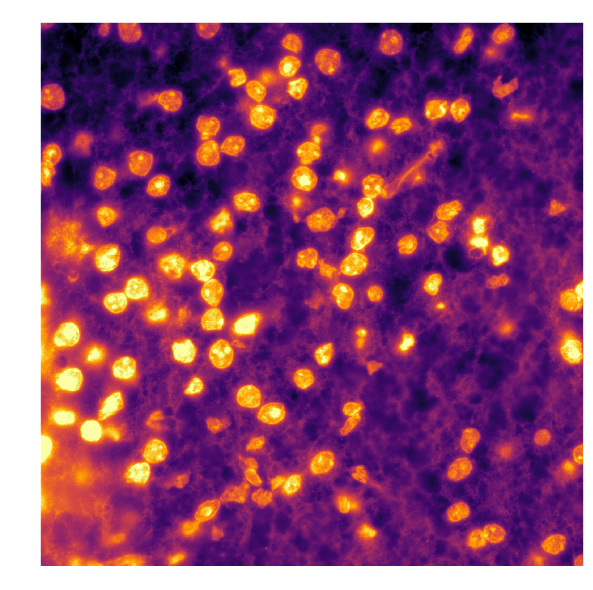

In [10]:
norm_img = (img-np.percentile(img.ravel(),0.1))
norm_img = (norm_img/np.percentile(norm_img.ravel(),99.9))
norm_img[norm_img<0] = 0
norm_img[norm_img>1]=1
norm_img = norm_img*255
Display(norm_img)

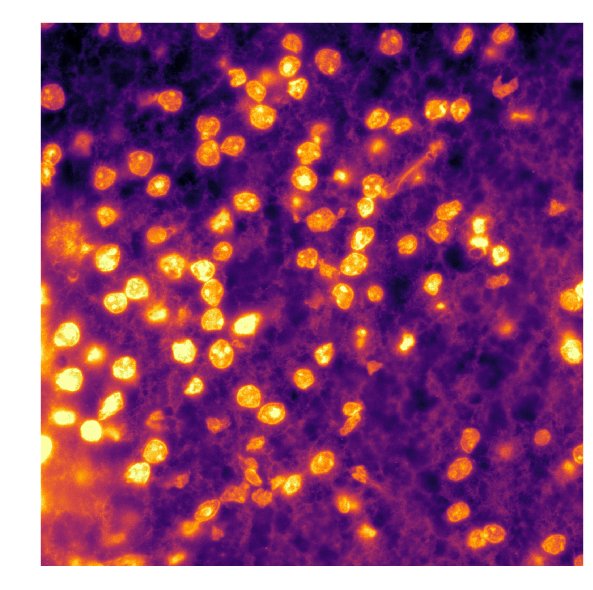

In [12]:
norm_img_8 = norm_img.astype('uint8')
Display(norm_img_8,rel_min=0,rel_max=0)

In [13]:
img, background = subtract_background_rolling_ball(norm_img_8, 300, light_background=False,use_paraboloid=False, do_presmooth=False)

KeyboardInterrupt: 

In [14]:
import time
start = time.time()
img_p, background_p = subtract_background_rolling_ball(norm_img_8, 300, light_background=False,use_paraboloid=True, do_presmooth=False)
print(time.time()-start)

667.3935625553131


In [ ]:
import time
start = time.time()
img_p, background_p = subtract_background_rolling_ball(norm_img_8, 10, light_background=False,use_paraboloid=False, do_presmooth=False)
print(time.time()-start)

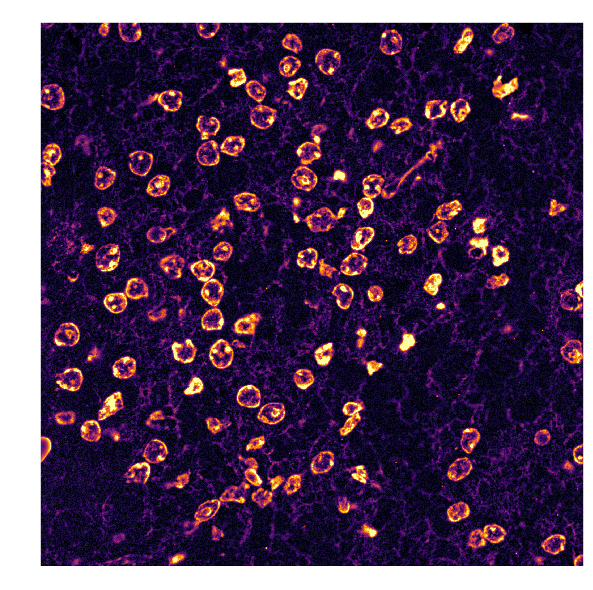

In [18]:
Display(img_p,rel_min=0,rel_max=0)

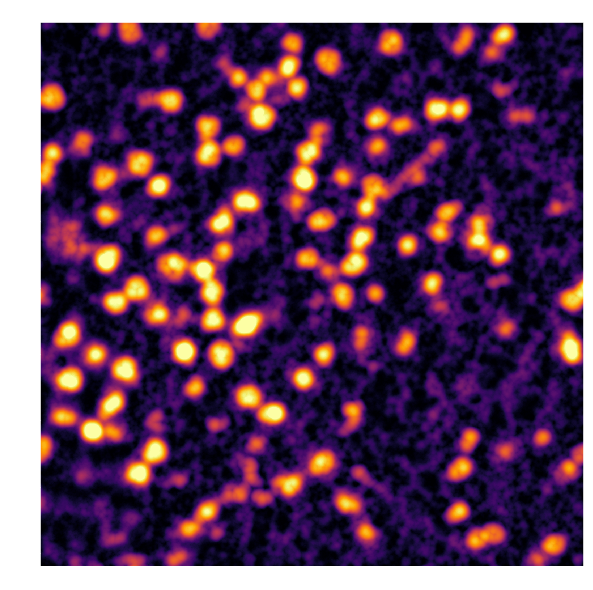

In [19]:
Display(background_p,rel_min=0,rel_max=0)